# Proyek Analisis Data: **Bike Sharing Dataset**
- **Nama:** Rosalia Dina Marina Sipahutar
- **Email:** rosalia03rrrbkl@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

1.   Bagaimana penggunaan Bike Sharing antara jam-jam puncak dan jam - jam non - puncak dalam sehari?
2.   Apakah terdapat pola penggunaan yang berkaitan dengan hari-hari tertentu dalam seminggu atau musim tertentu dalam setahun?
3.   Apakah ada tren jangka panjang dalam penggunaan sepeda selama periode tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
#Import Modul yang Diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Membaca dataset "day.csv" dari URL yang diberikan dan memuatnya ke dalam DataFrame "day_df"
day_df = pd.read_csv("https://raw.githubusercontent.com/search01/Proyek_Analisis_Data/main/Bike%20Sharing%20Dataset/day.csv")

# Menampilkan lima baris pertama dari DataFrame "day_df" untuk memeriksa struktur dan konten dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca dataset "hour.csv" dari URL yang diberikan dan memuatnya ke dalam DataFrame "hour_df"
hour_df = pd.read_csv("https://raw.githubusercontent.com/search01/Proyek_Analisis_Data/main/Bike%20Sharing%20Dataset/hour.csv")
# Menampilkan lima baris pertama dari DataFrame "hour_df" untuk memeriksa struktur dan konten dataset
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#####Menilai tabel `day_df`

In [4]:
# Menampilkan informasi tentang dataset "day_df" menggunakan metode ".info()"
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Menggunakan metode ".isna()" untuk mengecek nilai yang hilang dalam dataset "day_df", kemudian menjumlahkan jumlah nilai yang hilang di setiap kolom
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Mencetak jumlah duplikasi dalam DataFrame 'day_df'
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Menampilkan ringkasan statistik dari dataset "day_df" menggunakan metode ".describe()"
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#####Menilai tabel `hour_df`

In [8]:
# Menampilkan informasi tentang dataset "hour_df" menggunakan metode ".info()"
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Menggunakan metode ".isna()" untuk mengecek nilai yang hilang dalam dataset "hour_df", kemudian menjumlahkan jumlah nilai yang hilang di setiap kolom
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Mencetak jumlah duplikasi dalam DataFrame 'hour_df'
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

In [11]:
# Mengganti nama kolom untuk mempermudah bacaan
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [12]:
# Mengonversi kolom "dteday" dari tipe data string menjadi tipe data datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Mengonversi kolom "dteday" dari tipe data string menjadi tipe data datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Mencetak tipe data kolom "dteday" dalam DataFrame day_df
print('day_df["dteday"] : ', day_df["dteday"].dtypes)

# Mencetak tipe data kolom "dteday" dalam DataFrame hour_df
print('hour_df["dteday"] : ', hour_df["dteday"].dtypes)

day_df["dteday"] :  datetime64[ns]
hour_df["dteday"] :  datetime64[ns]


In [13]:
# Mengkonversi nilai kolom 'season' agar lebih mudah dipahami:
# 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# Mengkonversi nilai kolom 'month' agar lebih mudah dipahami:
# 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Mengkonversi nilai kolom 'weather_situation' agar lebih mudah dipahami:
# 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# Mengkonversi nilai kolom 'one_of_week' agar lebih mudah dipahami:
# 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Mengkonversi nilai kolom 'year' agar lebih mudah dipahami:
# 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung kelembapan (humidity) dalam persen
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

## Exploratory Data Analysis (EDA)

In [14]:
# Menampilkan ringkasan statistik untuk semua kolom, termasuk kolom non-numerik
day_df.describe(include="all")

<ipython-input-14-50b9b462aba1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000


In [15]:
# Menampilkan ringkasan statistik untuk semua kolom, termasuk kolom non-numerik
hour_df.describe(include="all")

<ipython-input-15-54c1a68fa3d6>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,0.167165,NaN,0.465431,NaN,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000


In [16]:
# Memeriksa format jam yang digunakan
# Menampilkan nilai maksimum dari kolom waktu
max_hours = hour_df["hours"].max()

# Jika nilai maksimum kurang dari atau sama dengan 12, kemungkinan besar dataset menggunakan format 12 jam
if max_hours <= 12:
    print("Dataset hour_df menggunakan format waktu 12 jam.")
else:
    print("Dataset hour_df menggunakan format waktu 24 jam.")

Dataset hour_df menggunakan format waktu 24 jam.


In [17]:
# Mengelompokkan data berdasarkan jam dan menhitung jumlah penyewaan untuk setiap jam
hourly_rentals = hour_df.groupby('hours')['count_cr'].sum()

# Menemukan jam dengan jumlah penyewaan maksimum
jam_max_penyewaan = hourly_rentals.idxmax()
jumlah_max_penyewaan = hourly_rentals.max()

print("Jam dengan penyewaan sepeda paling banyak:", jam_max_penyewaan, "Sore")
print("Jumlah penyewaan pada jam tersebut:", jumlah_max_penyewaan)

Jam dengan penyewaan sepeda paling banyak: 17 Sore
Jumlah penyewaan pada jam tersebut: 336860


In [18]:
# Menentukan jam-jam puncak dan jam-jam non-puncak
# Misalnya, jam puncak adalah 6-9 pagi dan 4-7 sore
peak_hours = [6, 7, 8, 9, 16, 17, 18, 19]
hour_df["peak_hour"] = hour_df["hours"].isin(peak_hours)

# Menghitung total penggunaan sepeda pada jam puncak dan non-puncak
peak_hour_usage = hour_df[hour_df["peak_hour"]]["count_cr"].sum()
non_peak_hour_usage = hour_df[~hour_df["peak_hour"]]["count_cr"].sum()

# Menampilkan total penggunaan sepeda pada jam puncak dan non-puncak
print("Total Penggunaan Sepeda pada Jam Puncak:", peak_hour_usage)
print("Total Penggunaan Sepeda pada Jam Non-puncak:", non_peak_hour_usage)

Total Penggunaan Sepeda pada Jam Puncak: 1730911
Total Penggunaan Sepeda pada Jam Non-puncak: 1561768


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana penggunaan Bike Sharing antara jam-jam puncak dan jam - jam non - puncak dalam sehari?

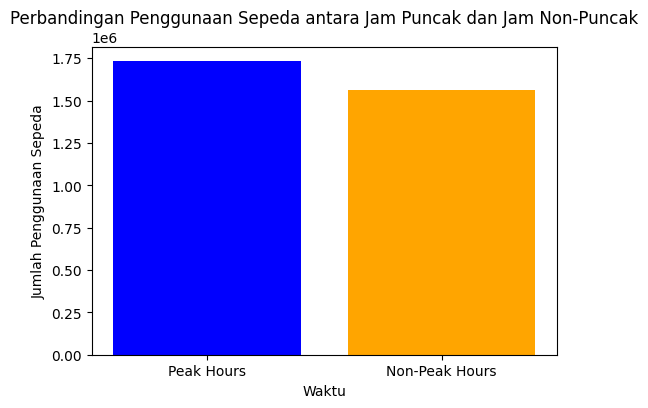

In [19]:
# Menyiapkan data
categories = ['Peak Hours', 'Non-Peak Hours']
usage = [peak_hour_usage, non_peak_hour_usage]

# Membuat plot
plt.figure(figsize=(6, 4))
plt.bar(categories, usage, color=['blue', 'orange'])
plt.title('Perbandingan Penggunaan Sepeda antara Jam Puncak dan Jam Non-Puncak')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.show()

### Pertanyaan 2: Apakah terdapat pola penggunaan yang berkaitan dengan hari-hari tertentu dalam seminggu atau musim tertentu dalam setahun?

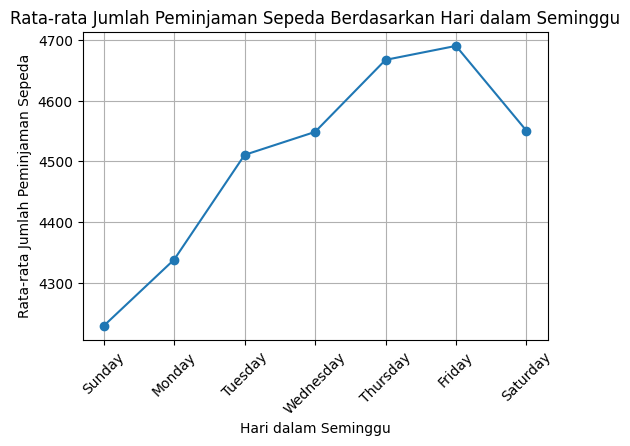

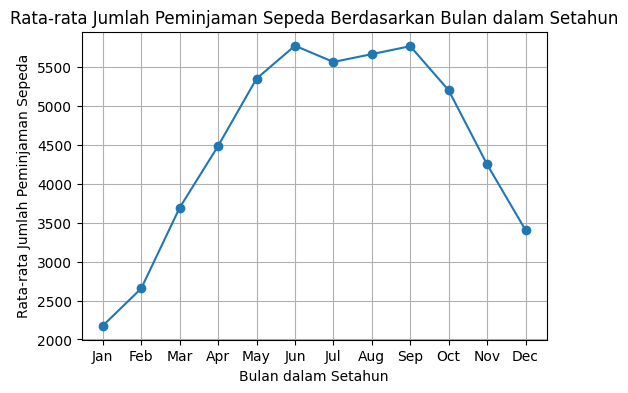

In [23]:
# Ekstrak hari dari kolom 'dteday'
day_df['day_of_week'] = day_df['dteday'].dt.day_name()

# Mengatur urutan hari dalam seminggu
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Mengubah kolom 'day_of_week' menjadi tipe kategori dengan urutan yang ditentukan
day_df['day_of_week'] = pd.Categorical(day_df['day_of_week'], categories=day_order, ordered=True)

# Ekstrak bulan dari kolom 'dteday'
day_df['month'] = day_df['dteday'].dt.month

# Visualisasi rata-rata jumlah peminjaman sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(6,4))
day_df.groupby('day_of_week')['count_cr'].mean().plot(marker='o')
plt.title('Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Menambahkan jarak
print("\n\n")

# Visualisasi rata-rata jumlah peminjaman sepeda berdasarkan bulan dalam setahun
plt.figure(figsize=(6,4))
day_df.groupby('month')['count_cr'].mean().plot(marker='o')
plt.title('Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Bulan dalam Setahun')
plt.xlabel('Bulan dalam Setahun')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Pertanyaan 3: Apakah ada tren jangka panjang dalam penggunaan sepeda selama periode tertentu?

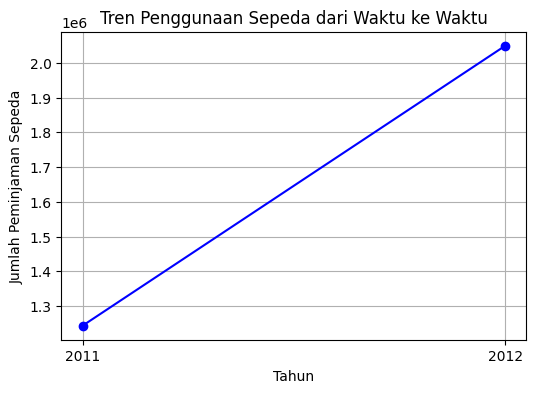

In [24]:
# Konversi kolom 'dteday' ke tipe data datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Ekstrak tahun dari kolom 'dteday'
day_df['year'] = day_df['dteday'].dt.year

# Hitung jumlah total peminjaman sepeda per tahun
yearly_rentals = day_df.groupby('year')['count_cr'].sum()

# Visualisasi tren penggunaan sepeda dari waktu ke waktu
plt.figure(figsize=(6, 4))
yearly_rentals.plot(marker='o', color='blue')
plt.title('Tren Penggunaan Sepeda dari Waktu ke Waktu')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(True)
plt.xticks(yearly_rentals.index)
plt.show()

## Conclusion

####Conclution pertanyaan 1

Dari visualisasi data didapatkan bahwa penggunaan Bike Sharing banyak digunakan ketika jam - jam puncak (Peak Hours) dengan waktu yang dibuat ialah dari jam 6 - 9 Pagi. Pada jam non - puncak ( Non -peak Hours, 4 - 7 Sore) penyewa bike sharing tetap banyak dan tidak berselisih jauh dari Peak Hours

####Conclution pertanyaan 2

Penyewaan meningkat di hari jumat dan menurun di hari minggu. Hari Minggu sering kali dianggap sebagai hari libur di banyak negara, di mana orang-orang mungkin cenderung menghabiskan waktu di rumah atau melakukan aktivitas yang berbeda dari pada hari-hari kerja.

####Conclution pertanyaan 3

Ditahun 2011 hingga 2012 trend Bike Sharing meningkat dan dalam jangka waktu 1 tahun